In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [32]:
cmu_movies = pd.read_csv('data/cmu_movies.csv', sep='\t')
metacritic_reviews = pd.read_csv('data/scrap/metacritic_reviews.csv')
imdb_reviews = pd.read_csv('data/title.ratings.tsv', sep='\t')

In [35]:
metacritic_reviews

,publisher,author,metacritic_rating,metascore,metacritic_id
0,L.A. Weekly,Paul Malcolm,80.0,35.0,movie/ghosts-of-mars
1,New Times (L.A.),Gregory Weinkauf,80.0,35.0,movie/ghosts-of-mars
2,Chicago Sun-Times,Roger Ebert,75.0,35.0,movie/ghosts-of-mars
3,Chicago Tribune,Michael Wilmington,63.0,35.0,movie/ghosts-of-mars
4,Salon,Andrew O'Hehir,60.0,35.0,movie/ghosts-of-mars
...,...,...,...,...,...
159014,New York Daily News,Joe Neumaier,60.0,65.0,movie/knuckle
159015,NPR,Scott Tobias,60.0,65.0,movie/knuckle
159016,The New York Times,Manohla Dargis,60.0,65.0,movie/knuckle
159017,Slant Magazine,Bill Weber,50.0,65.0,movie/knuckle


In [42]:
# Filter movies with metacritic reviews and freebase id
alldata_movies = cmu_movies.loc[(cmu_movies['imdb_id'].isin(imdb_reviews['tconst'])) & (cmu_movies['metacritic_id'].isin(metacritic_reviews['metacritic_id']))]

alldata_movies_merged = pd.merge(alldata_movies, imdb_reviews, left_on='imdb_id', right_on='tconst').drop(columns=['tconst'])

# Average metacritic score
metacritic_reviews_metascores = metacritic_reviews.groupby('metacritic_id').head(1).drop(columns=['author', 'publisher', 'metacritic_rating'])

alldata_movies_merged = pd.merge(alldata_movies_merged, metacritic_reviews_metascores, left_on='metacritic_id', right_on='metacritic_id')

In [43]:
alldata_movies_merged

,wikipedia_id,freebase_id,title,release_date,revenue,runtime,languages,countries,genres,imdb_id,metacritic_id,averageRating,numVotes,metascore
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",tt0228333,movie/ghosts-of-mars,4.9,56930,35.0
1,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",tt0097499,movie/henry-v,7.5,31214,83.0
2,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",tt0058331,movie/mary-poppins,7.8,181857,88.0
3,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",tt0133122,movie/new-rose-hotel,5.1,5989,31.0
4,21926710,/m/05p45cv,White on Rice,2009,NaN,82.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",tt0892904,movie/white-on-rice,6.1,545,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8043,25920477,/m/0b6lqyd,Source Code,2011-03-11,147332697.0,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",tt0945513,movie/source-code,7.5,540377,74.0
8044,4492078,/m/0c5clj,How to Eat Fried Worms,2006-08-25,13040527.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hqxf"": ""Family Film"", ""/m/07s9rl0"": ""Dra...",tt0462346,movie/how-to-eat-fried-worms,5.3,5883,56.0
8045,54540,/m/0f7hw,Coming to America,1988-06-29,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/03p5xs"": ""...",tt0094898,movie/coming-to-america,7.1,219010,47.0
8046,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana...",tt0120202,movie/state-and-main,6.7,21900,75.0


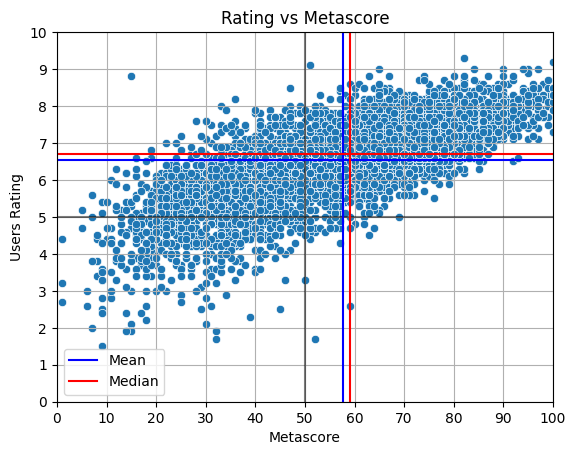

In [58]:
sns.scatterplot(x="metascore", y="averageRating", data=alldata_movies_merged)
plt.title("Rating vs Metascore")
plt.xticks(range(0, 101, 10))
plt.yticks(range(0, 11, 1))
plt.xlim(0, 100)
plt.ylim(0, 10)
plt.xlabel("Metascore")
plt.ylabel("Users Rating")
plt.grid()

# plot center lines
plt.axhline(y=5, color='k', linestyle='-', alpha=0.5)
plt.axvline(x=50, color='k', linestyle='-', alpha=0.5)

# plot mean lines
plt.axhline(y=alldata_movies_merged['averageRating'].mean(), color='b', linestyle='-')
plt.axvline(x=alldata_movies_merged['metascore'].mean(), color='b', linestyle='-')

# plot median lines
plt.axhline(y=alldata_movies_merged['averageRating'].median(), color='r', linestyle='-')
plt.axvline(x=alldata_movies_merged['metascore'].median(), color='r', linestyle='-')

# legend the lines but not the scatter plots
import matplotlib.lines as mlines
blue_line = mlines.Line2D([], [], color='blue', label='Mean')
red_line = mlines.Line2D([], [], color='red', label='Median')
plt.legend(handles=[blue_line, red_line])

plt.show()

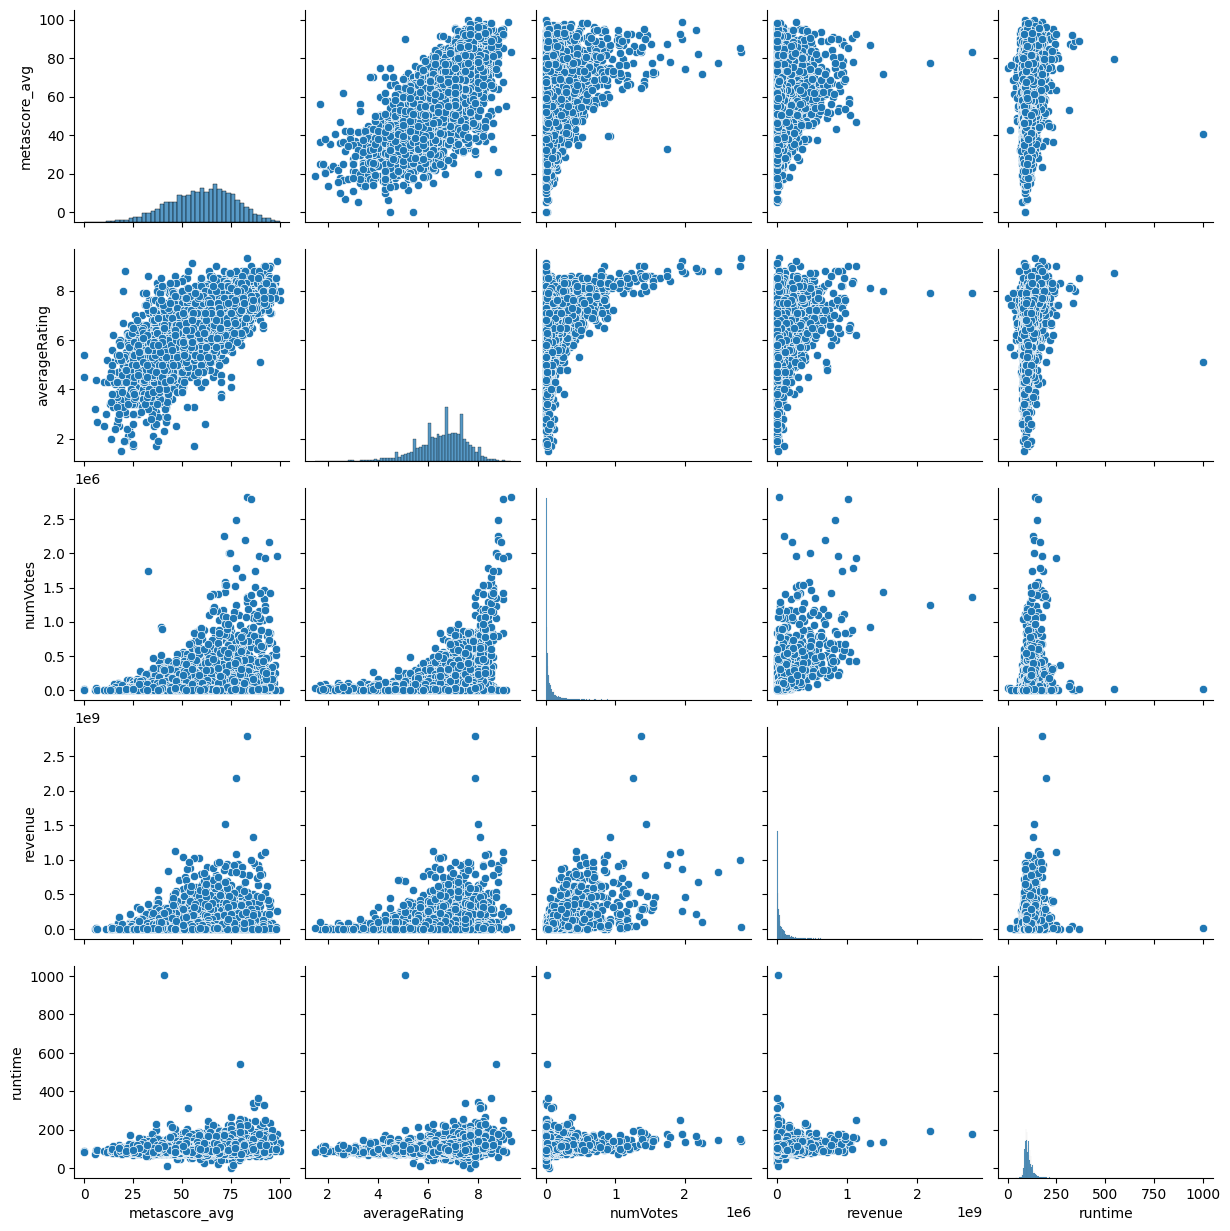

In [28]:
sns.pairplot(alldata_movies_merged[['metascore_avg', 'averageRating', 'numVotes', 'revenue', 'runtime']])

<Axes: xlabel='averageRating', ylabel='revenue'>

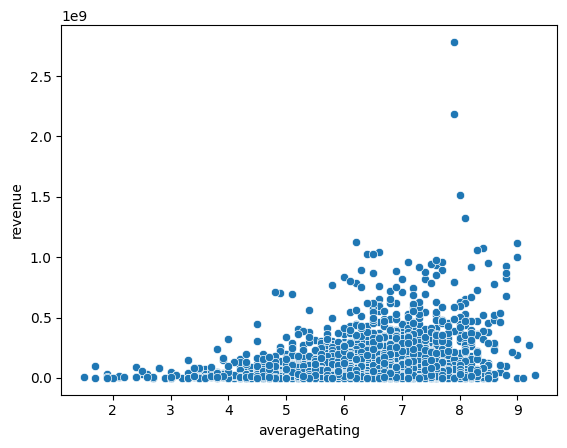

In [19]:
sns.scatterplot(y="revenue", x="averageRating", data=alldata_movies_merged)

## Publisher Ratings Analysis

In [110]:
top_publishers = metacritic_reviews \
    .groupby('publisher') \
    .agg({'rating': ['count']}) \
    .sort_values(by=[('rating', 'count')], ascending=False) \
    .head(20) \
    .reset_index() \
    ['publisher']

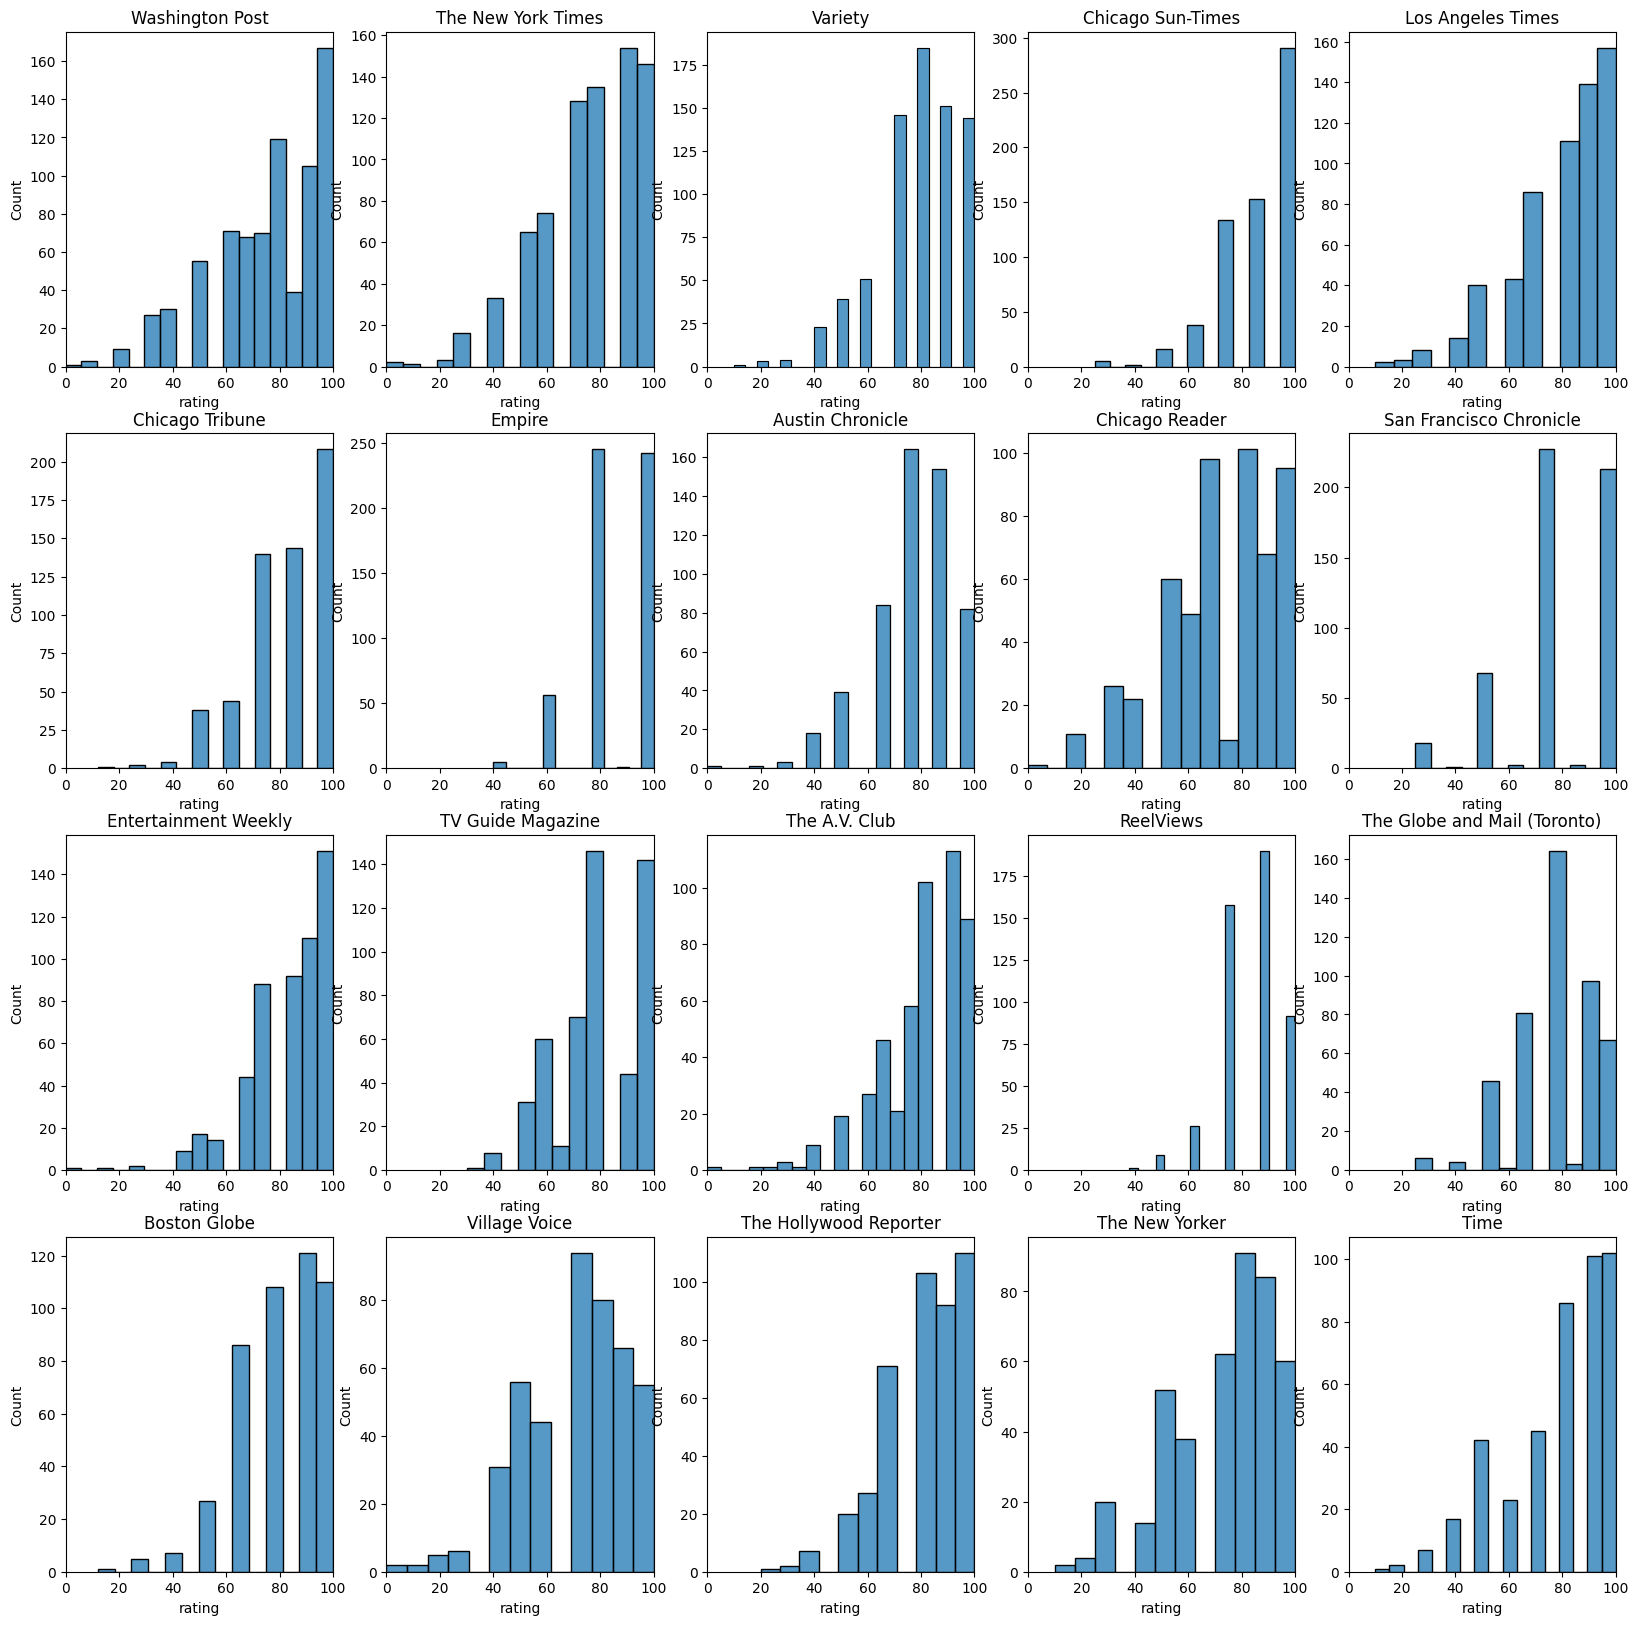

In [116]:
# create one subplot for each publisher
fig, axs = plt.subplots(len(top_publishers) // 5, 5, figsize=( 20, (len(top_publishers) // 5) * 5))

# plot the distribution of ratings for each publisher
for i, publisher in enumerate(top_publishers):
    ax = axs[i // 5][i % 5]
    ax.set_title(publisher)
    sns.histplot(metacritic_reviews.loc[metacritic_reviews['publisher'] == publisher]['rating'], ax=ax)
    ax.set_xlim(0, 100)

plt.show()


In [38]:
merged_metacritic_reviews = metacritic_reviews.merge(cmu_movies.loc[(cmu_movies['metacritic_id'].isin(metacritic_reviews['metacritic_id'])) & ~(cmu_movies['metacritic_id'].isna()), ('metacritic_id', 'genres')], on='metacritic_id', how='left')

In [56]:
# Assuming 'merged_metacritic_reviews' is your DataFrame
def extract_genres(row):
    try:
        genres_dict = ast.literal_eval(row['genres'])
        return list(genres_dict.values())
    except:
        return []
    

# Apply the function to extract genres
merged_metacritic_reviews['extracted_genres'] = merged_metacritic_reviews.apply(extract_genres, axis=1)

# Explode the DataFrame to have a separate row for each genre
exploded_df = merged_metacritic_reviews.explode('extracted_genres')

# Group by genre and calculate mean and count of ratings
grouped_df = exploded_df.groupby('extracted_genres').agg({'rating': ['mean', 'count']})

# Sort by the count of ratings and take the top 10
top_genres = grouped_df.sort_values(by=('rating', 'mean'), ascending=False).head(10)

In [79]:
# select one occurence per movie
exploded_df.groupby('extracted_genres').agg({'rating': ['mean', 'count']}).sort_values(by=('rating', 'mean'), ascending=False)

rating      
                              mean count
extracted_genres                        
Propaganda film          94.772727    22
Jungle Film              93.866667    15
Mockumentary             91.966667    30
Alien invasion           90.687500    16
Sword and sorcery films  89.885965   114
...                            ...   ...
Live action              49.846154    13
Film à clef              43.922078    77
Star vehicle             40.384615    39
Demonic child            38.023256    43
Legal drama              37.454545    44

[209 rows x 2 columns]